# Employee data
Employee data for classification task

About Dataset
<br>
Context:
<br>
This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy
<br>
 while still providing valuable insights into the workforce.

Columns:

Education: The educational qualifications of employees, including degree, institution, and field of study.

Joining Year: The year each employee joined the company, indicating their length of service.

City: The location or city where each employee is based or works.

Payment Tier: Categorization of employees into different salary tiers.

Age: The age of each employee, providing demographic insights.

Gender: Gender identity of employees, promoting diversity analysis.

Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

Experience in Current Domain: The number of years of experience employees have in their current field.

Leave or Not: a target column

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport
import pickle

# import warnings

# # Example of using warnings to ignore specific warnings
# warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier



# Import classification algorithms from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier  # Requires xgboost library


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# # Load the dataset

In [153]:
# Load the dataset
emp_df = pd.read_csv(r"C:\\Users\\ASUS\\OneDrive\\Desktop\\Employee\\Employee-ML-\\employee_classification\\Employee.csv")
emp_df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [154]:
# Generate a data profiling report
profile = ProfileReport(emp_df, title="Data Profiling Report")
profile.to_file("data_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 123.06it/s]


# Data perprocessing 

In [155]:
emp_df.shape 

(4653, 9)

In [156]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [157]:
# Find total null values in each column
null_values = emp_df.isnull().sum()

# Print the total count of null values for each column
print("Null values in each column:\n", null_values)

Null values in each column:
 Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [158]:
duplicates = emp_df.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

# Print total duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

Total duplicate rows: 1889


In [159]:
# Drop duplicates
emp_df = emp_df.drop_duplicates()


In [160]:
duplicates = emp_df.duplicated()

# Count total duplicates
total_duplicates = duplicates.sum()

# Print total duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

Total duplicate rows: 0


In [161]:
emp_df.shape 

(2764, 9)

In [162]:
emp_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [163]:
# For a summary of all columns, including categorical ones, use 'include="all"'
print(emp_df.describe(include='all'))

        Education  JoiningYear       City  PaymentTier          Age Gender  \
count        2764  2764.000000       2764  2764.000000  2764.000000   2764   
unique          3          NaN          3          NaN          NaN      2   
top     Bachelors          NaN  Bangalore          NaN          NaN   Male   
freq         1971          NaN       1171          NaN          NaN   1529   
mean          NaN  2015.090449        NaN     2.636035    30.952967    NaN   
std           NaN     1.885943        NaN     0.624001     5.108872    NaN   
min           NaN  2012.000000        NaN     1.000000    22.000000    NaN   
25%           NaN  2013.000000        NaN     2.000000    27.000000    NaN   
50%           NaN  2015.000000        NaN     3.000000    30.000000    NaN   
75%           NaN  2017.000000        NaN     3.000000    35.000000    NaN   
max           NaN  2018.000000        NaN     3.000000    41.000000    NaN   

       EverBenched  ExperienceInCurrentDomain   LeaveOrNot  
co

In [164]:
emp_df.describe().corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,0.462100,0.469811,0.461895,0.461494
PaymentTier,0.462100,1.000000,0.999949,0.999999,1.000000
Age,0.469811,0.999949,1.000000,0.999953,0.999942
ExperienceInCurrentDomain,0.461895,0.999999,0.999953,1.000000,0.999998
LeaveOrNot,0.461494,1.000000,0.999942,0.999998,1.000000


# EDA

In [165]:
emp_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [166]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


In [167]:
# Method 2: Select columns with the category data type (if applicable)
categorical_columns = emp_df.select_dtypes(include='object').columns
categorical_columns


Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')

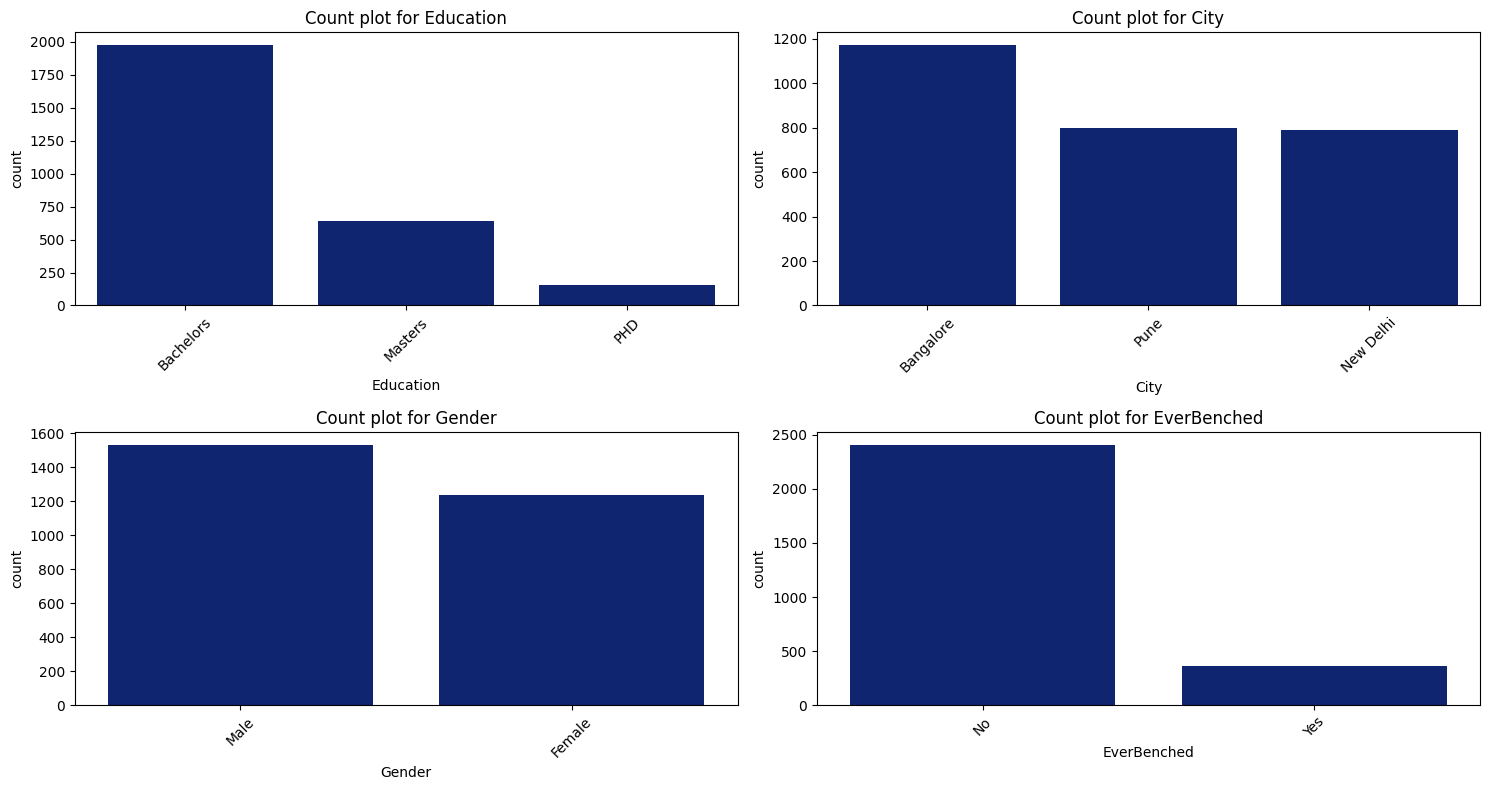

In [168]:

# List of categorical columns
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']

# Plot count plots for each categorical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=emp_df, x=col)
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability if needed
plt.tight_layout()
plt.show()


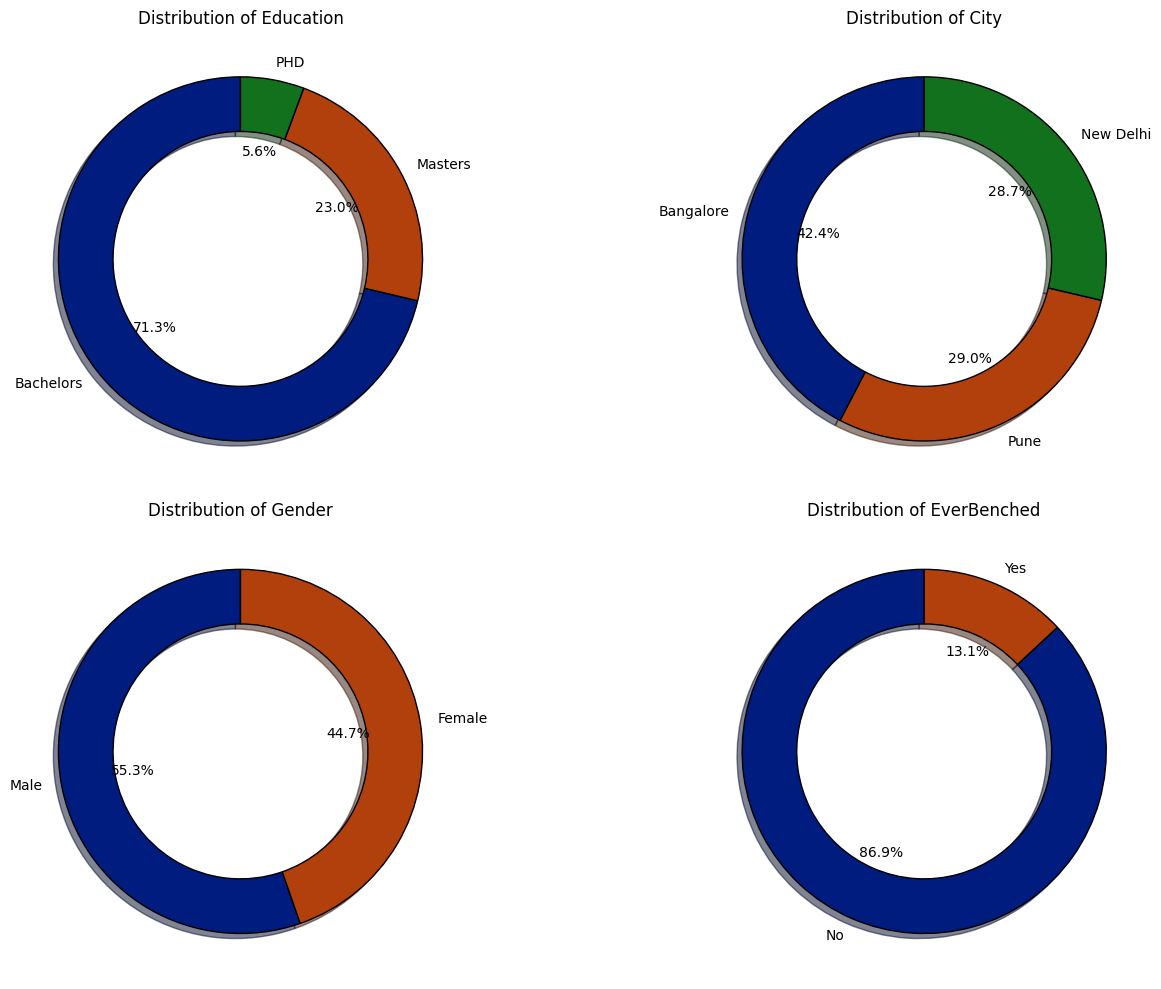

In [169]:
# List of categorical columns
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']

# Plot pie charts for each categorical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    emp_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,shadow=True, wedgeprops={'edgecolor': 'black', 'width': 0.3})
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hide y-axis label for a cleaner look
plt.tight_layout()
plt.show()

In [170]:
# Find numerical columns
numerical_columns =emp_df.select_dtypes(include='number').columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'LeaveOrNot'],
      dtype='object')


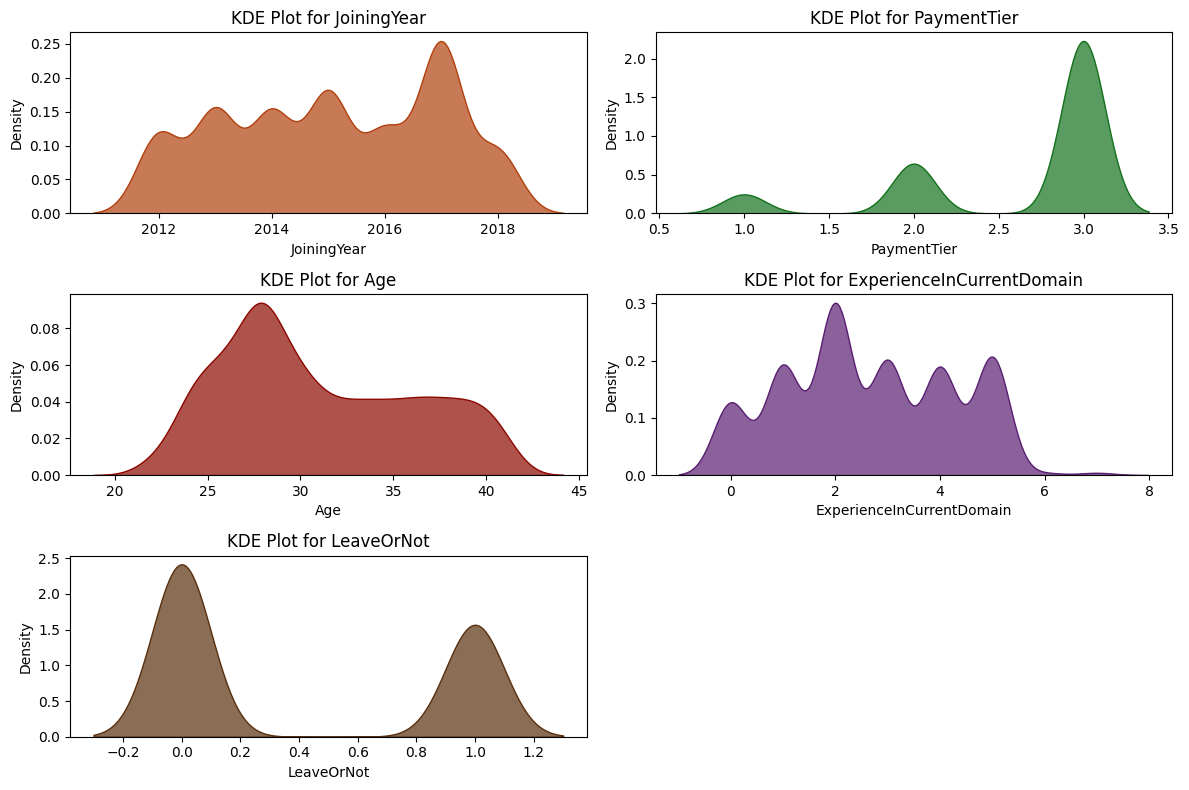

In [171]:
# Numerical columns
numerical_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']

# Set a dark color palette
# You can choose any of the available dark palettes, here I use 'dark' palette
palette = sns.color_palette("dark")

# Plot KDE plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.kdeplot(emp_df[col], fill=True, color=palette[i % len(palette)], alpha=0.7)
    plt.title(f'KDE Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# No outlies in the data 

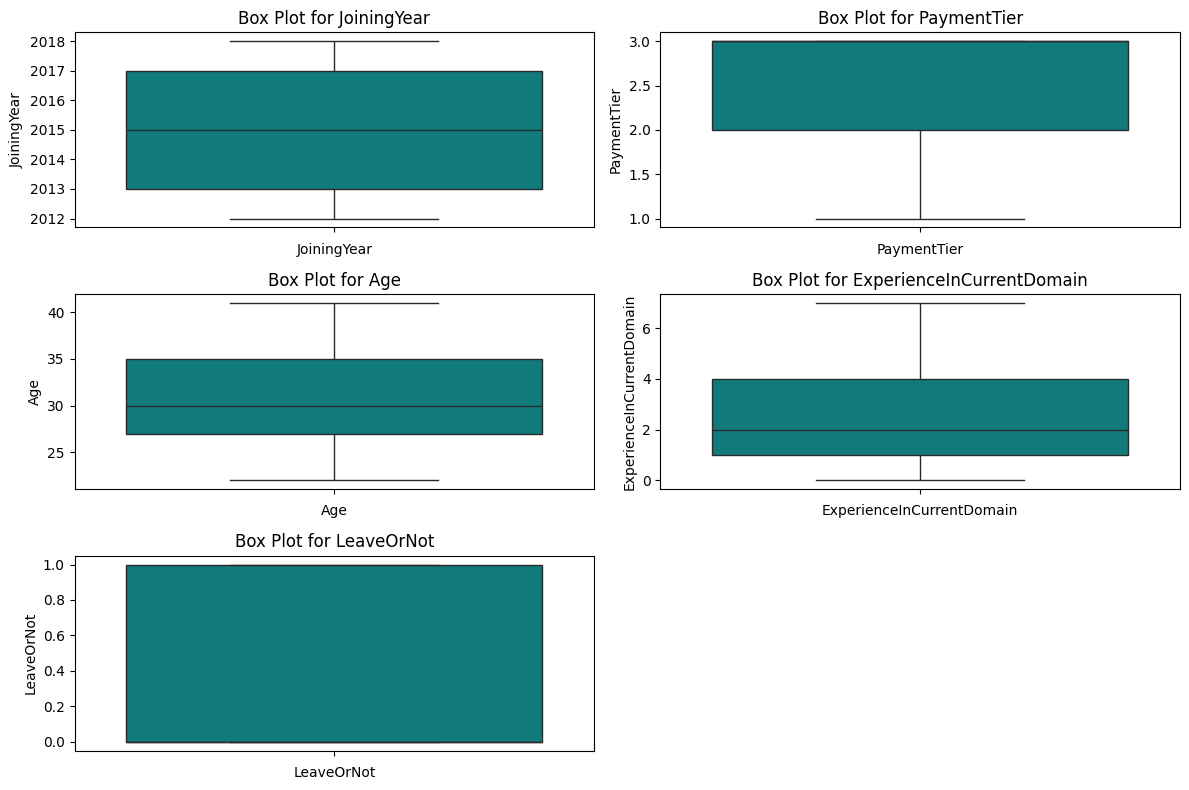

In [172]:
# Numerical columns
numerical_columns = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.boxplot(emp_df[col], color='darkcyan')  # You can change the color as desired
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [173]:
emp_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [174]:
emp_df['PaymentTier'].value_counts()

PaymentTier
3    1976
2     570
1     218
Name: count, dtype: int64

## handling the outlies in the data using Interquartile Range (IQR) 

In [175]:
# Calculate Q1 and Q3
Q1 = emp_df['PaymentTier'].quantile(0.25)
Q3 = emp_df['PaymentTier'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR range
data_no_outliers = emp_df[~((emp_df['PaymentTier'] < (Q1 - 1.5 * IQR)) | (emp_df['PaymentTier'] > (Q3 + 1.5 * IQR)))]


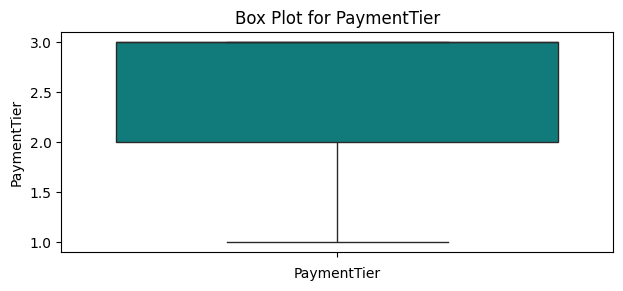

In [176]:
# Numerical columns
numerical_columns = ['PaymentTier']

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.boxplot(emp_df[col], color='darkcyan')  # You can change the color as desired
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


## Pair plot only for the numerical columns 

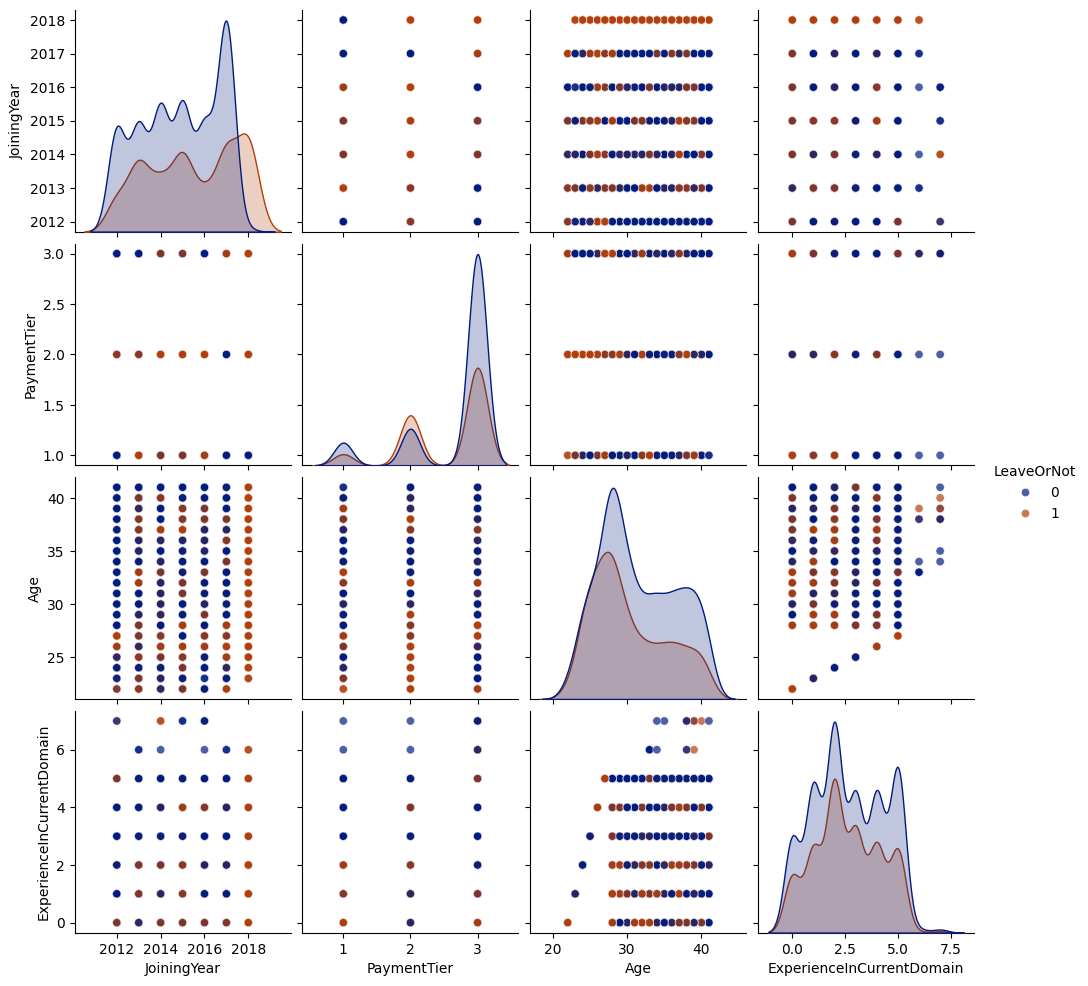

In [177]:

# Create a pair plot
sns.pairplot(emp_df, diag_kind='kde', plot_kws={'alpha': 0.7},hue = 'LeaveOrNot')
plt.show()


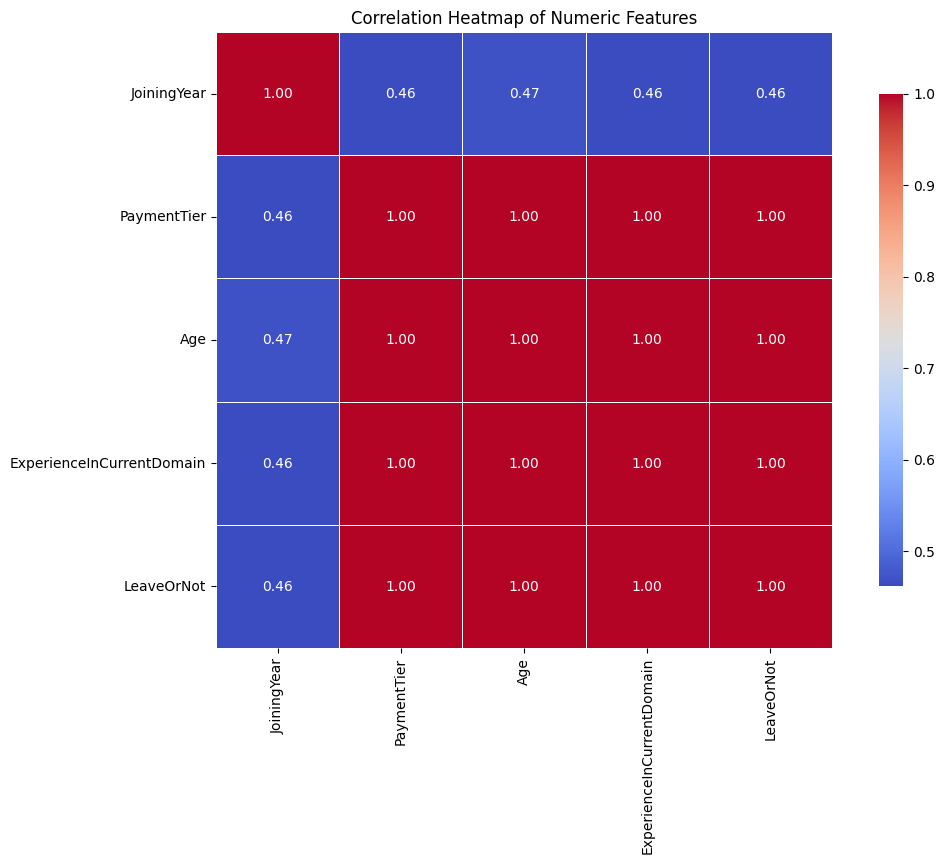

In [178]:
corr = emp_df.describe().corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Heatmap of Numeric Features')

# Show the plot
plt.show()

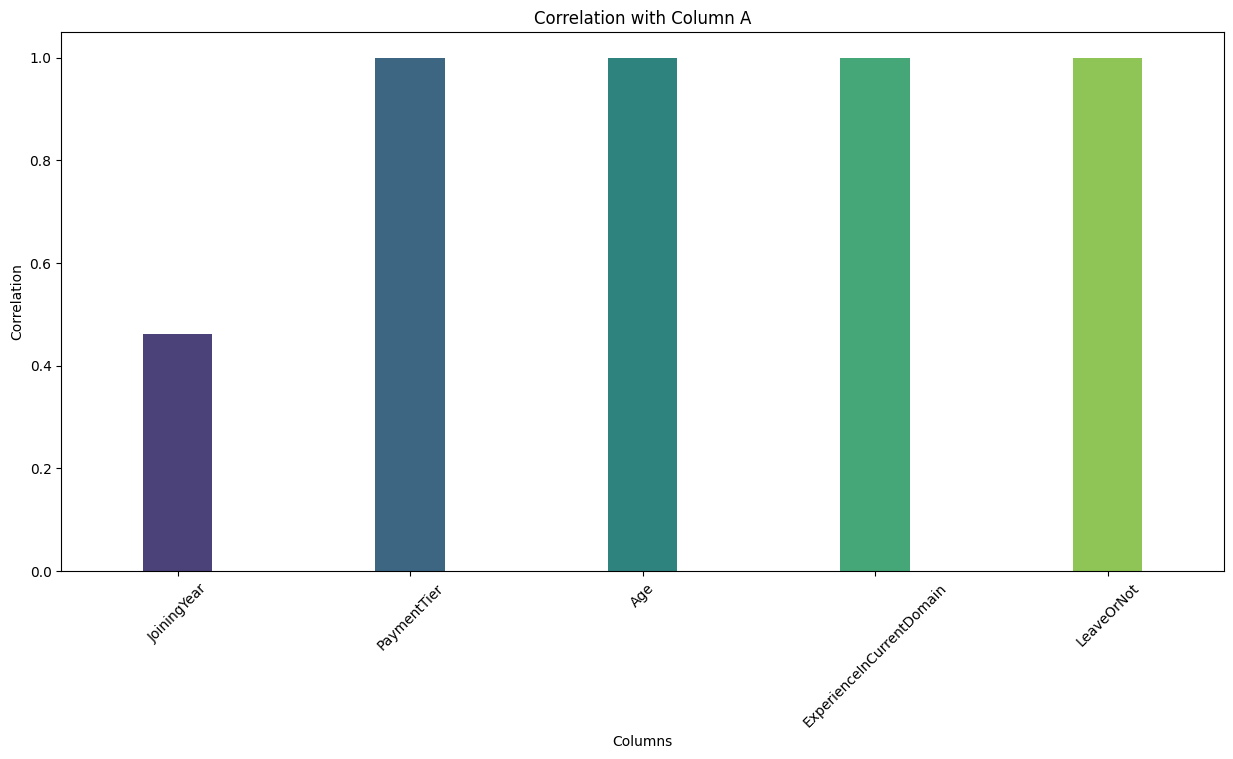

In [179]:
plt.figure(figsize=(15, 7))
sns.barplot(x=corr.columns, y=corr.iloc[1], palette='viridis',linewidth=3,width=0.3,orient='v')
# sns.barplot(corr,palette='Set2',edgecolor='black', linewidth=3,width=0.3,orient='v',)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation') 

# Set the angle of the x-axis labels
plt.xticks(rotation=45)     
plt.show() 

Preprocess Data with Column Transformation

In [180]:
emp_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [181]:
# Drop column 'B'
x = emp_df.drop('LeaveOrNot', axis=1)
y = emp_df['LeaveOrNot'] 

In [182]:
x.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2


In [183]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [184]:
x.shape 

(2764, 8)

In [185]:
y.shape 

(2764,)

In [186]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [187]:
print("x_train shape:",x_train.shape,"x_test shape :",x_test.shape ,"y_train shape :",y_train.shape,"y_test shape : ",y_test.shape)

x_train shape: (2211, 8) x_test shape : (553, 8) y_train shape : (2211,) y_test shape :  (553,)


In [188]:
x_train.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
4629,Bachelors,2017,Bangalore,2,35,Male,No,0
3412,Bachelors,2014,Bangalore,3,33,Male,No,1
1082,Bachelors,2012,Bangalore,3,28,Male,No,5
292,Bachelors,2017,New Delhi,2,28,Male,No,1
2595,Bachelors,2014,Bangalore,3,26,Female,Yes,4


In [189]:
x_test.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
3571,Bachelors,2018,Bangalore,3,38,Male,Yes,3
2519,PHD,2015,Pune,2,30,Female,No,4
2853,Bachelors,2012,Bangalore,3,29,Male,No,4
4325,Bachelors,2015,Bangalore,3,22,Male,Yes,0
2755,Bachelors,2017,Bangalore,1,30,Male,No,1


In [190]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 4629 to 1707
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2211 non-null   object
 1   JoiningYear                2211 non-null   int64 
 2   City                       2211 non-null   object
 3   PaymentTier                2211 non-null   int64 
 4   Age                        2211 non-null   int64 
 5   Gender                     2211 non-null   object
 6   EverBenched                2211 non-null   object
 7   ExperienceInCurrentDomain  2211 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 155.5+ KB


In [191]:
y_train.head()

4629    0
3412    1
1082    0
292     0
2595    0
Name: LeaveOrNot, dtype: int64

In [192]:
y_test.head()

3571    1
2519    0
2853    0
4325    0
2755    0
Name: LeaveOrNot, dtype: int64

In [193]:
# Separate numerical and categorical columns
numerical_features = x.select_dtypes(include=['number']).columns
categorical_features = x.select_dtypes(include=['object']).columns

In [194]:
print(numerical_features)
print()
print(categorical_features)

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')

Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object')


In [195]:
# Preprocessing for numerical data (Standard scaling) and categorical data (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),categorical_features)
    ])

In [196]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Education', 'City', 'Gender', 'EverBenched'], dtype='object'))])

In [197]:
# Fit and transform for classification
x_class_train = preprocessor.fit_transform(x_train)
x_class_test = preprocessor.transform(x_test)

In [198]:
x_class_train.shape 
# print(x_class_train.columns)

(2211, 14)

In [199]:
x_class_test

array([[ 1.55058528,  0.58933014,  1.3601337 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.05244342, -1.00359032, -0.20370177, ...,  0.        ,
         1.        ,  0.        ],
       [-1.65547213,  0.58933014, -0.3991812 , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-1.65547213,  0.58933014, -1.18109894, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.55058528,  0.58933014, -1.18109894, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.01624238, -1.00359032,  0.1872571 , ...,  0.        ,
         1.        ,  0.        ]])

In [200]:
# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier()  # Adjust for warning
}

In [204]:
# Variables to store the best model and score --> extra variable 
best_model = None
best_score = 0
best_model_name = ""

# Train each classifier and print the accuracy
for name, clf in classifiers.items():
    # Create a pipeline with preprocessing and the classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])



    # Fit the pipeline on the training data
    pipeline.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(x_test)
    
    # Calculate metrics
       # Print the cross-validation results and test set metrics
    print(f"Classifier: {name}")
#     print(f"Cross-validated Accuracy (mean of 5-fold): {mean_cv_accuracy:.2f}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("_____________________________________________________________________________")





# Update the best model if this model has a higher accuracy or chosen metric
    if accuracy > best_score:  # Use accuracy or replace with `f1` for F1 score
        best_score = accuracy
        best_model = pipeline
        best_model_name = name

# Save the best model to a pickle file
if best_model:
    with open(f'best_model_{best_model_name}.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print(f"\nBest model '{best_model_name}' saved with an accuracy of {best_score:.2f}")


Classifier: Logistic Regression
Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1 Score: 0.68
_____________________________________________________________________________
Classifier: KNN
Accuracy: 0.72
Precision: 0.71
Recall: 0.72
F1 Score: 0.71
_____________________________________________________________________________
Classifier: SVC
Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1 Score: 0.79
_____________________________________________________________________________
Classifier: Decision Tree
Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1 Score: 0.68
_____________________________________________________________________________
Classifier: Random Forest
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72
_____________________________________________________________________________
Classifier: Gradient Boosting
Accuracy: 0.79
Precision: 0.80
Recall: 0.79
F1 Score: 0.79
_____________________________________________________________________________
Classifier: Naive Bayes
Accuracy

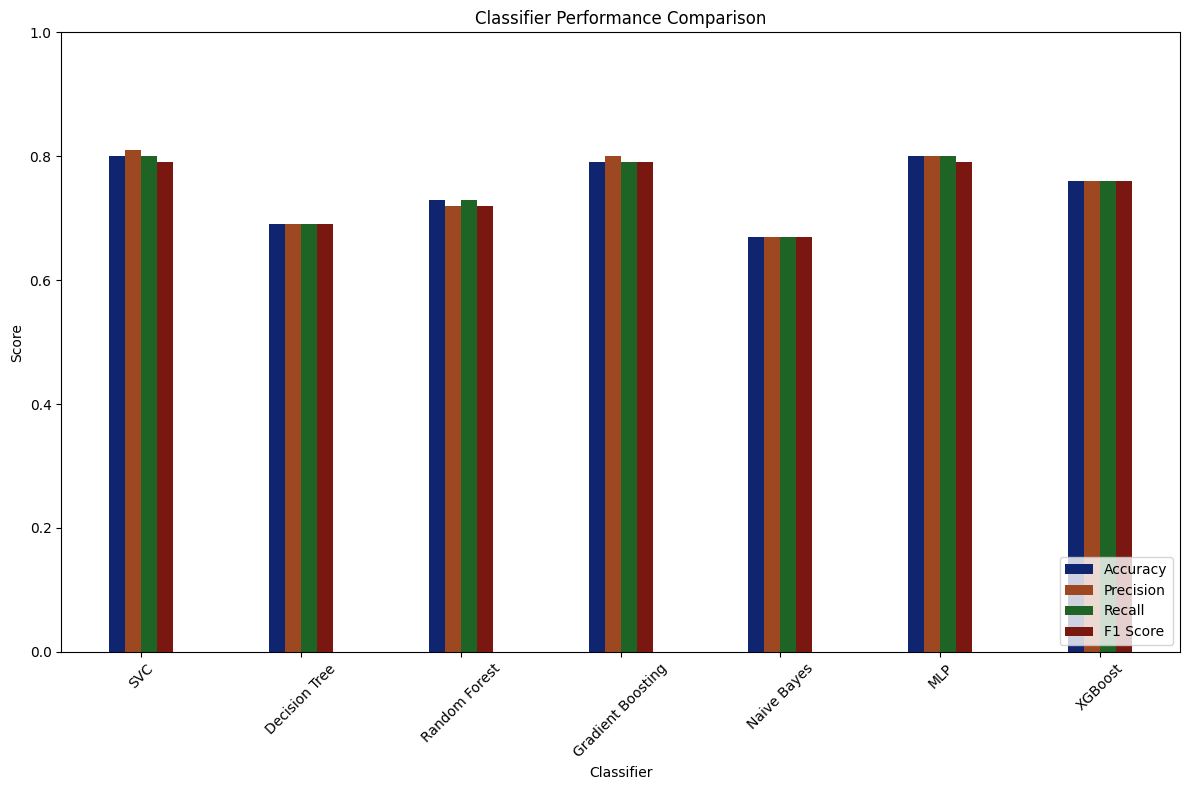

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for plotting
data = {
    'Classifier': ['SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'MLP', 'XGBoost'],
    'Accuracy': [0.80, 0.69, 0.73, 0.79, 0.67, 0.80, 0.76],
    'Precision': [0.81, 0.69, 0.72, 0.80, 0.67, 0.80, 0.76],
    'Recall': [0.80, 0.69, 0.73, 0.79, 0.67, 0.80, 0.76],
    'F1 Score': [0.79, 0.69, 0.72, 0.79, 0.67, 0.79, 0.76]
}

# Convert data to DataFrame for easier plotting
df = pd.DataFrame(data)

# Set style and plot
plt.figure(figsize=(12, 8))
sns.set_palette("dark")

# Melt the DataFrame to long format for Seaborn plotting
df_melted = df.melt(id_vars='Classifier', var_name='Metric', value_name='Score')



# Plot the barplot
bar_width = 0.4# Set the desired bar width here
sns.barplot(data=df_melted, x='Classifier', y='Score', hue='Metric',width=bar_width)
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Classifier")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


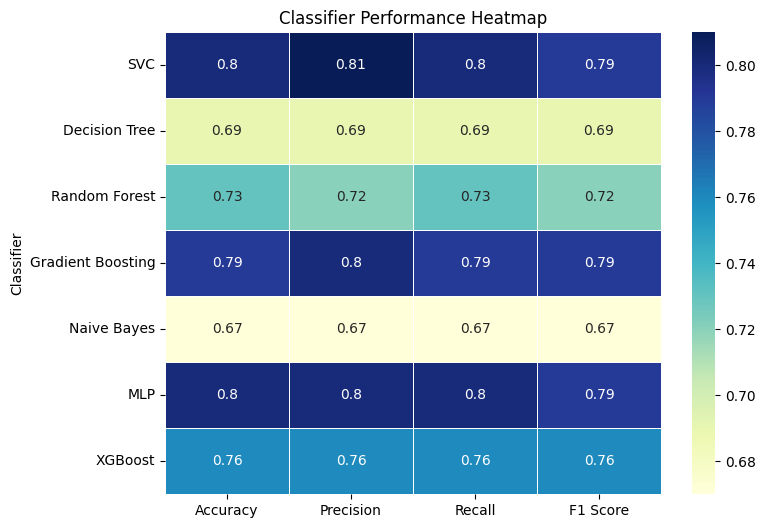

In [203]:
# Example data in a DataFrame format
data = {
    'Classifier': ['SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Naive Bayes', 'MLP', 'XGBoost'],
    'Accuracy': [0.80, 0.69, 0.73, 0.79, 0.67, 0.80, 0.76],
    'Precision': [0.81, 0.69, 0.72, 0.80, 0.67, 0.80, 0.76],
    'Recall': [0.80, 0.69, 0.73, 0.79, 0.67, 0.80, 0.76],
    'F1 Score': [0.79, 0.69, 0.72, 0.79, 0.67, 0.79, 0.76]
}
df = pd.DataFrame(data).set_index('Classifier')

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Classifier Performance Heatmap")
plt.show()
